## Production Tank 2202- Qty  20 Tonnes tank

### Importing all the necessary libraries

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

### Upload CSV File 

In [3]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank

Unnamed: 0  Material    BATCHID Tank_1  \
0              0   1002150  107643491   2503   
1              1   1002150  107643491   2503   
2              2   1002150  107643491   2503   
3              3   1002150  107643491   2503   
4              4   1002150  107643491   2503   
...          ...       ...        ...    ...   
9482        9482   3055706  107737576   2502   
9483        9483   3055706  107737576   2502   
9484        9484   3055706  107737576   2502   
9485        9485   3055706  107737576   2502   
9486        9486   3055706  107737576   2502   

                                   Instruction_Step INGRED_ID  \
0                              S3_BATCH_IN_PROGRESS       NaN   
1                                        STEP1_CONS   1002565   
2                       PLEASE VERIFY BULK ADDITION       NaN   
3                                        STEP1_CONS   1037802   
4                                        STEP1_CONS   1002818   
...                                             ...       ...   
9482               TAKE A SAMPLE AND SUBMIT FOR QA.       NaN   
9483  SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE)       NaN   
9484                                STEP8_AGITATION       NaN   
9485                   S4_BATCH_COMPLETE_QA_PENDING       NaN   
9486                         S7_RELEASED_TO_FILLING       NaN   

                               INGRED_Name  Quantity       Phase_start  \
0                                      NaN     0.000  09/03/2022 10:42   
1                            WATER TREATED  5760.000  09/03/2022 10:42   
2                                      NaN     0.000  09/03/2022 11:16   
3     S813     SOD BENZOATE          XFX25     5.629  09/03/2022 11:17   
4     S651     CITRIC ACID ANH    BG XFX25    78.766  09/03/2022 11:27   
...                                    ...       ...               ...   
9482                                   NaN     0.000  08/05/2022 11:43   
9483                                   NaN     0.000  08/05/2022 11:54   
9484                                   NaN     0.000  08/05/2022 11:56   
9485                                   NaN     0.000  08/05/2022 11:56   
9486                                   NaN     0.000  08/05/2022 12:02   

             Phase_end  Phase_duration  Phase_start_delay  Phase_row_no  \
0     09/03/2022 10:42               0                  0             1   
1     09/03/2022 11:16              34                  0             2   
2     09/03/2022 11:17               1                  0             3   
3     09/03/2022 11:27              10                  0             4   
4     09/03/2022 11:38              11                  0             5   
...                ...             ...                ...           ...   
9482  08/05/2022 11:54              11                  0            19   
9483  08/05/2022 11:55               1                  0            20   
9484  08/05/2022 11:56               0                  1            21   
9485  08/05/2022 11:56               0                  0            22   
9486  08/05/2022 12:02               0                  6            23   

      Flowrate_KGMIN  Target_Flowrate  Target_Phase_duration  Phase_overrun  \
0             0.0000              NaN                      0            NaN   
1           169.4118         733.5050                      8           26.0   
2             0.0000              NaN                      3            0.0   
3             0.5629           6.3182                      1            9.0   
4             7.1605           6.3182                     12            0.0   
...              ...              ...                    ...            ...   
9482          0.0000              NaN                     10            1.0   
9483          0.0000              NaN                     10            0.0   
9484          0.0000              NaN                      0            0.0   
9485          0.0000              NaN                      0        

In [37]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

### Filter the ProductionTank df to show only 22MT02 production results

In [38]:
ProductionTank2202_df= ProductionTank.query('Tank_1 == "%s"' % 2202)
print(ProductionTank2202_df) 

      Material    BATCHID Tank_1                  Instruction_Step INGRED_ID  \
2001   1397022  107956670   2202              S3_BATCH_IN_PROGRESS       NaN   
2002   1397022  107956670   2202                        STEP1_CONS   1002565   
2003   1397022  107956670   2202       PLEASE VERIFY BULK ADDITION       NaN   
2004   1397022  107956670   2202                        STEP1_CONS   1037802   
2005   1397022  107956670   2202                        STEP1_CONS   1002818   
...        ...        ...    ...                               ...       ...   
7746   1775253  108026760   2202      S4_BATCH_COMPLETE_QA_PENDING       NaN   
7747   1775253  108026760   2202  TAKE A SAMPLE AND SUBMIT FOR QA.       NaN   
7748   1775253  108026760   2202        SAMPLE TO LAB. RESULTS OK?       NaN   
7749   1775253  108026760   2202      S4_BATCH_COMPLETE_QA_PENDING       NaN   
7750   1775253  108026760   2202            S7_RELEASED_TO_FILLING       NaN   

                               INGRED_N

### Filter the ProductionTank2202_df by Material and INGRED_Name columns

NB: Looking at ingredients ( Material_Name ) addition in the material production in this tank 2202

In [36]:
# Group by the 'Material','Material_Name' column
#grouped = ProductionTank2202_df.groupby(['Material','INGRED_Name'])

#grouped.head()
# Apply aggregation functions to the grouped data
#mean_values = grouped.mean()
#sum_values = grouped['Quantity'].sum()
#count_values = grouped['Phase_duration'].count()

#print("Mean Values:")
#print(mean_values)

#print("\nSum Values:")
#print(sum_values)

#print("\nCount Values:")
#print(count_values)

### Aggregation of data per tank : by Material

In [7]:
#Aggregate data per tank
#aggregated_ProductionTank2202_df = ProductionTank2202_df.groupby(['Material','INGRED_ID']).agg({
   # 'Phase_duration': 'sum',
    #'Phase_overrun': 'sum',
    #'Phase_start_delay':'sum',
    #'Quantity':'sum',
    #'Flowrate_KGMIN':'sum',
    #'Target_Phase_duration':'sum',
  
   # 'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank2202_df)

### Aggregation of data per tank : by BATCHID

In [8]:
#Aggregate data per tank
aggregated_ProductionTank2202_df1 = ProductionTank2202_df.groupby(['BATCHID','Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'mean',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2202_df1)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107848868   1520984             806      31.333333           3.500000   
1   107867810   1648637            1098      46.526316         107.300000   
2   107899926   1775253            1399      65.000000         121.277778   
3   107949892   1775253             279      13.400000           5.545455   
4   107956670   1397022             621      20.111111         247.105263   
5   107963677   1775253             191       9.500000         782.000000   
6   107964387   1520984             199       5.000000           2.000000   
7   107964410   1775253             591      18.750000         175.117647   
8   107969769   1397022             163      27.333333           5.166667   
9   107971404   1520984             205       9.333333           0.400000   
10  107978116   1648637             480      14.210526         208.700000   
11  107992045   1520984             193       2.000000           0.400000   

### Data Visualisation 

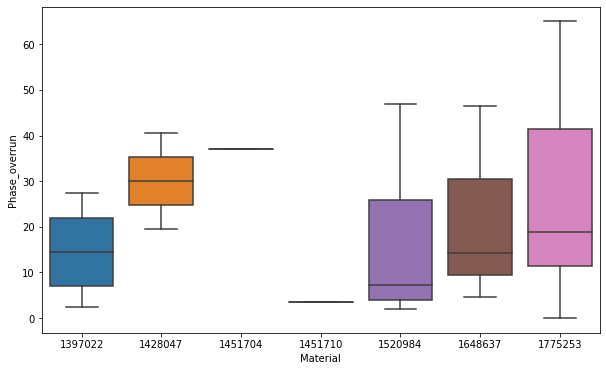

In [9]:
# Box plot to visualize the distribution of Phase_overrun across different Materials
plt.figure(figsize=(10, 6))
sns.boxplot(data=aggregated_ProductionTank2202_df1, x='Material', y='Phase_overrun')
plt.show()

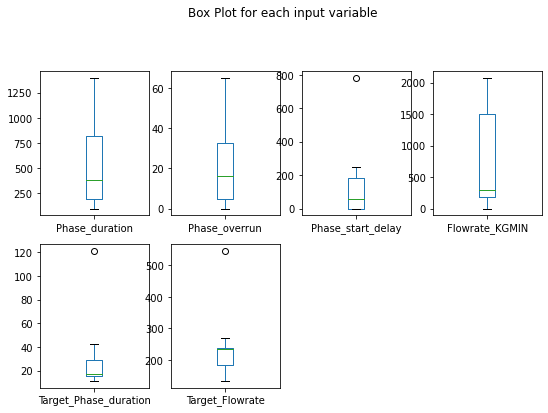

In [11]:
aggregated_ProductionTank2202_df1.drop(['BATCHID','Material'], axis=1).plot(kind='box', subplots=True,layout=(3,4), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('aggregated_ProductionTank2202_df1')
plt.show()

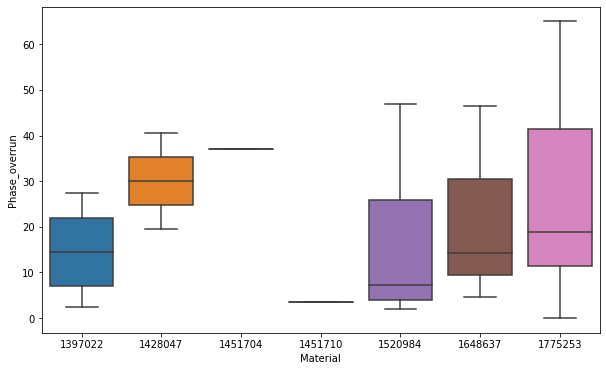

In [9]:
# Box plot to visualize the distribution of Phase_overrun across different Materials
plt.figure(figsize=(10, 6))
sns.boxplot(data=aggregated_ProductionTank2202_df1, x='Material', y='Phase_overrun')
plt.show()

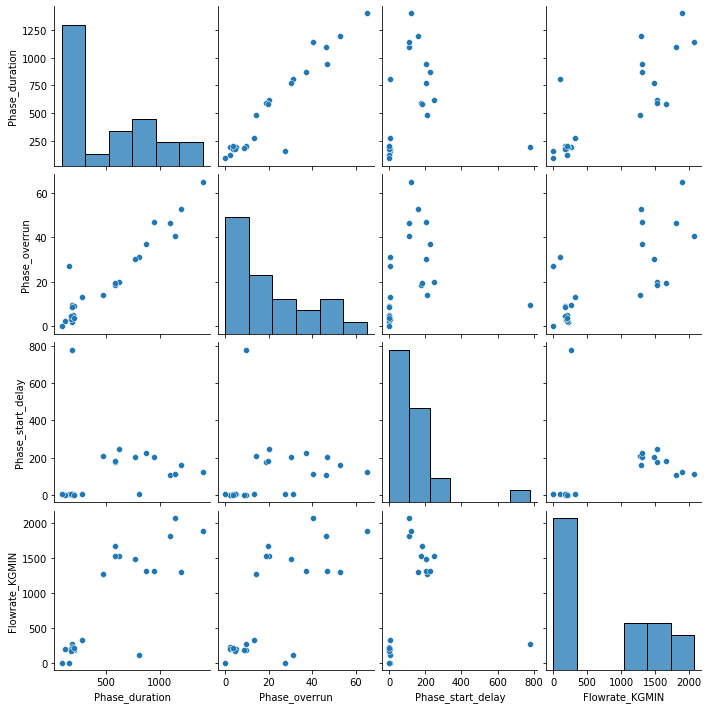

In [12]:
# Pair plot to visualize relationships between numeric variables
numeric_columns = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
sns.pairplot(aggregated_ProductionTank2202_df1[numeric_columns])
plt.show()

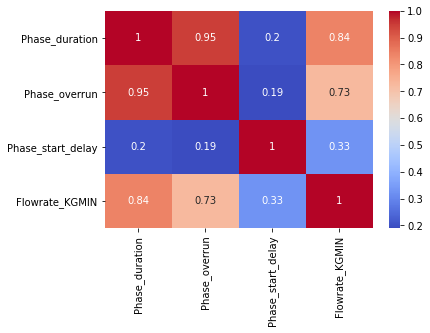

In [11]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = aggregated_ProductionTank2202_df1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
aggregated_ProductionTank2202_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BATCHID                24 non-null     int64  
 1   Material               24 non-null     int64  
 2   Phase_duration         24 non-null     int64  
 3   Phase_overrun          24 non-null     float64
 4   Phase_start_delay      24 non-null     float64
 5   Flowrate_KGMIN         24 non-null     float64
 6   Target_Phase_duration  24 non-null     float64
 7   Target_Flowrate        22 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 1.6 KB


In [13]:
# Handling duplicates
aggregated_ProductionTank2202_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [14]:
print(aggregated_ProductionTank2202_df1.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107848868   1520984             806      31.333333           3.500000   
1  107867810   1648637            1098      46.526316         107.300000   
2  107899926   1775253            1399      65.000000         121.277778   
3  107949892   1775253             279      13.400000           5.545455   
4  107956670   1397022             621      20.111111         247.105263   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0        106.3590             121.500000       237.850400  
1       1808.4135              11.150000       177.123836  
2       1892.5296              16.611111       221.862100  
3        327.0000              13.454545       547.500000  
4       1534.1302              16.263158       160.241280  


In [16]:
# Define columns where you want to detect and remove outliers
ProductionTank2202_df2 = pd.DataFrame(aggregated_ProductionTank2202_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank2202_df2 = remove_outliers_iqr(ProductionTank2202_df2, col)

# Display the cleaned DataFrame
print(ProductionTank2202_df2)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
1   107867810   1648637            1098      46.526316         107.300000   
2   107899926   1775253            1399      65.000000         121.277778   
4   107956670   1397022             621      20.111111         247.105263   
6   107964387   1520984             199       5.000000           2.000000   
7   107964410   1775253             591      18.750000         175.117647   
9   107971404   1520984             205       9.333333           0.400000   
10  107978116   1648637             480      14.210526         208.700000   
11  107992045   1520984             193       2.000000           0.400000   
12  107993270   1428047             586      19.421053         179.700000   
13  107999494   1775253            1194      52.823529         159.833333   
14  108015838   1397022             123       2.333333           0.400000   
15  108015839   1397022             188       8.666667           0.400000   

In [17]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank2202_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank2202_df2.describe())

Original DataFrame Summary Statistics:
            BATCHID      Material  Phase_duration  Phase_overrun  \
count  2.400000e+01  2.400000e+01       24.000000      24.000000   
mean   1.079892e+08  1.576924e+06      529.541667      21.328740   
std    5.946938e+04  1.495923e+05      406.923450      18.591542   
min    1.078489e+08  1.397022e+06       93.000000       0.000000   
25%    1.079642e+08  1.445790e+06      190.250000       4.900000   
50%    1.079927e+08  1.520984e+06      379.500000      16.480263   
75%    1.080278e+08  1.775253e+06      822.750000      32.763889   
max    1.080848e+08  1.775253e+06     1399.000000      65.000000   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count          24.000000       24.000000              24.000000   
mean          114.620921      809.379187              25.773593   
std           169.651628      732.151394              22.869944   
min             0.400000        0.000000              11.100000   
25%          

In [18]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank2202_df2[numerical_cols] = scaler.fit_transform(ProductionTank2202_df2[numerical_cols])
print(ProductionTank2202_df2.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
1  107867810   1648637        1.249073       1.233222           0.047951   
2  107899926   1775253        1.986651       2.187340           0.198049   
4  107956670   1397022        0.080219      -0.131054           1.549225   
6  107964387   1520984       -0.953861      -0.911503          -1.082794   
7  107964410   1775253        0.006706      -0.201352           0.776199   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
1        1.169362              11.150000       177.123836  
2        1.288865              16.611111       221.862100  
4        0.779689              16.263158       160.241280  
6       -1.117585              40.800000       237.850400  
7        0.780120              17.352941       247.907363  


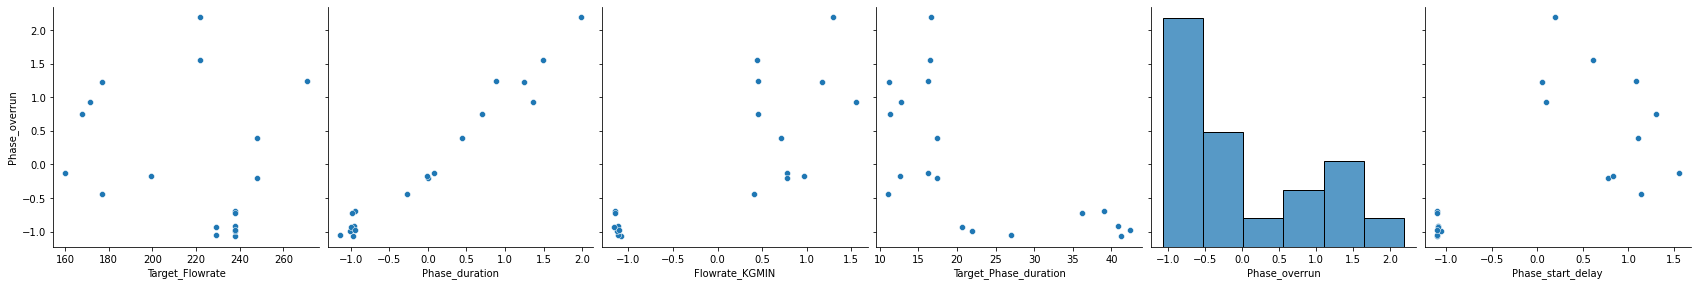

In [41]:
#Step 3: Visualization
#Let us plot the scatter plot for target variable vs. predictor variables in a single plot to get the intuition. Also, plotting a heatmap for all the variables,

#Importing seaborn library for visualizations
import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(ProductionTank2202_df2, x_vars=['Target_Flowrate','Phase_duration','Flowrate_KGMIN','Target_Phase_duration','Phase_overrun','Phase_start_delay'], y_vars = 'Phase_overrun', size = 4, kind = 'scatter' )
plt.show()

### Applying Machine Learning Algorithms 

Without Hyperparameter 

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2202_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
rf_feature_importance = rf_model.feature_importances_

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
gb_feature_importance = gb_model.feature_importances_

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2202results.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+------------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |    Test R2 |
+====+=============================+=============+============+============+============+
|  0 | Linear Regression           | 0.00218427  |   0.11115  |   0.997134 |  0.929305  |
+----+-----------------------------+-------------+------------+------------+------------+
|  1 | Ridge Regression            | 0.0218693   |   0.359897 |   0.971302 |  0.771092  |
+----+-----------------------------+-------------+------------+------------+------------+
|  2 | Lasso Regression            | 0.432269    |   1.62396  |   0.432756 | -0.0329012 |
+----+-----------------------------+-------------+------------+------------+------------+
|  3 | Random Forest Regressor     | 0.0101516   |   0.337443 |   0.986679 |  0.785373  |
+----+-----------------------------+-------------+------------+------------+------------+
|  4 | Gra

In [32]:
#pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Explanation of results before tuning : 
  Train MSE and Test MSE:

The Mean Squared Error (MSE) gives an indication of how far the predictions of our model are from the actual values. Lower MSE indicates a better model fit.
The Random Forest Regressor, Gradient Boosting Regressor, and Decision Tree Regressor have particularly low training MSE, indicating they fit the training data very well. However, a very low training MSE might also hint at overfitting, especially if there's a significant gap between train and test MSE.
On the testing set, the Linear Regression and Decision Tree Regressor models appear to perform the best, having the lowest test MSE values.
Train R2 and Test R2:

The (R-squared) value represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A value close to 1 indicates a good fit.
The Random Forest Regressor, Gradient Boosting Regressor, Decision Tree Regressor, and Extra Trees Regressor all have an 
of 1 on the training data, indicating they have captured all the variability of the training data. Again, this could be a sign of overfitting if the test  is significantly lower.
On the testing set, the Linear Regression model has the highest indicating it generalizes well to unseen data among the models tested.

General Observations
There is a notable difference in the performance of models on training data vs. testing data. Models with perfect scores (like Gradient Boosting, Decision Tree, and Extra Trees) on training data don't have equally perfect scores on testing data. This disparity suggests that these models might be overfitting the training data and may not generalize well to new, unseen data.
The Linear Regression model, despite its simplicity, has managed to generalize well on the test set, showing the importance of always considering simpler models as baselines or for comparison.
Recommendations:

Given the results, if the goal is to deploy a model that will generalize well to unseen data, the Linear Regression model seems to be a strong contender.
However, if the objective is to understand feature importance or have a model that can capture non-linear relationships better, tree-based models like Random Forest or Gradient Boosting may be more appropriate, but be cautious about overfitting. Regularizing or pruning these models might be beneficial.
For models showing signs of overfitting (like Random Forest, Gradient Boosting, Decision Tree, etc.), consider pruning the trees, using fewer trees, or introducing other regularization techniques.
Remember, model performance can also vary based on the nature of the data, the feature engineering that has been applied, and the hyperparameters chosen for each model.

In [29]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")

LinearRegression:
  Mean MSE: 0.047119
  Std MSE: 0.019565

Ridge:
  Mean MSE: 0.129159
  Std MSE: 0.071192

Lasso:
  Mean MSE: 1.136012
  Std MSE: 0.509014

RandomForestRegressor:
  Mean MSE: 0.116132
  Std MSE: 0.134226

GradientBoostingRegressor:
  Mean MSE: 0.117651
  Std MSE: 0.103248

SVR:
  Mean MSE: 1.203860
  Std MSE: 0.731424

MLPRegressor:
  Mean MSE: 3315167125729.744629
  Std MSE: 3056544900977.161621

DecisionTreeRegressor:
  Mean MSE: 0.233217
  Std MSE: 0.309303

ExtraTreesRegressor:
  Mean MSE: 0.087738
  Std MSE: 0.088977

AdaBoostRegressor:
  Mean MSE: 0.076826
  Std MSE: 0.037983

BaggingRegressor:
  Mean MSE: 0.093976
  Std MSE: 0.100119



Linear Regression and AdaBoostRegressor seem to be the best performers in terms of both average prediction error (MSE) and consistency (low standard deviation).
MLPRegressor performed very poorly. It would be worth revisiting the model's hyperparameters or considering data preprocessing steps like normalization.
Models like Random Forest, Gradient Boosting, and Decision Tree have variable performance across different folds, suggesting they might be sensitive to the specific subsets of the data they train on.

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank2202_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)


# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)


# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)




# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2202 TUN results.xlsx', index=False)



+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           |  0.00218427 |   0.11115  |   0.997134 |  0.929305 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            |  0.00219048 |   0.113931 |   0.997126 |  0.927535 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            |  0.00574386 |   0.136204 |   0.992463 |  0.913369 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     |  0.00932277 |   0.34372  |   0.987766 |  0.781381 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost